In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [3]:
loan_train = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\train_ctrUa4K.csv'
loan_test = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\test_lAUu6dG.csv'

# Reading Data

In [4]:
loan_train = pd.read_csv(loan_train)
loan_test = pd.read_csv(loan_test)

In [5]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
loan_train.shape

(614, 13)

In [9]:
loan_test.shape

(367, 12)

# If Missing values (NaN values) are passed into a model it will give an error and also can reduce model accuracy significantly. So we will find missing value and treat them

In [11]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

isnull() and isna() show us the missing values in the dataset

# Treating Missing values

# Now that we have found missing values in variables, we have to fill them to treat them. 
# There are many ways to fill missing values, widely used are filling them with Mean/Median/Mode and/or using linear regression/ Random Forest/ K nearest Neighbours method.

# I am using Mean/Median/Mode to fill the missing values

# For Numeric variables mean/median and for categorical and ordinal variables mode, are widely used method to fill missing values

In [13]:
loan_train.describe(exclude="number")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001552,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [14]:
# 489 out of 614 applicants are male, so we will impute male inplace of missing values
loan_train["Gender"] = loan_train["Gender"].fillna("Male")
loan_test["Gender"] = loan_test["Gender"].fillna("Male")

In [15]:
# 398 out of 614 applicants are married, so we will impute yes inplace of missing values
loan_train["Married"] = loan_train["Married"].fillna("Yes")
loan_test["Married"] = loan_test["Married"].fillna("Yes")

In [16]:
# 500 out of 614 applicants are not self_Employed, so we will impute No inplace of missing values
loan_train["Self_Employed"] = loan_train["Self_Employed"].fillna("No")
loan_test["Self_Employed"] = loan_test["Self_Employed"].fillna("No")

In [17]:
loan_train["Dependents"]=np.where(loan_train["Dependents"]=="3+",3,loan_train["Dependents"])

In [18]:
loan_train["Dependents"]=pd.to_numeric(loan_train["Dependents"],errors='coerce')

In [19]:
loan_train["Dependents"].dtypes

dtype('float64')

# As Dependent variable was a numerical variable, but it was stored as object due to its value 3+, we have treated it have converted it to numeric variable

In [20]:
loan_train["Dependents"].mean()

0.7629382303839732

# As standard pratice we replace missing values of Numeric variables with mean. However, Dependent variable values are ordinal (0,1,2,3) so replacing them with mean of 0.763 doesn't make sense. So we will use Mode to impute missing values of Dependent variable

In [21]:
loan_train["Dependents"].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [22]:
# 345 out of 614 applicants have 0 Dependents, so we will impute 0 inplace of missing values
loan_train["Dependents"]=loan_train["Dependents"].fillna('0')
loan_test["Dependents"]=loan_test["Dependents"].fillna('0')

In [23]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


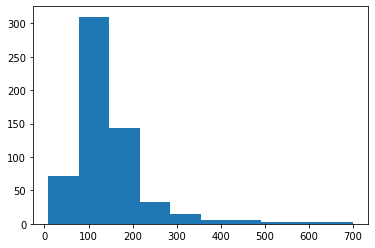

In [24]:
plt.hist(x="LoanAmount", data=loan_train)
plt.show()

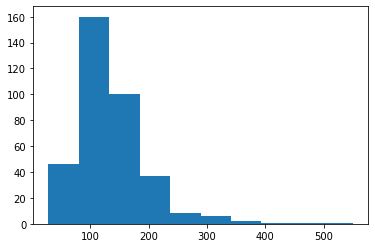

In [25]:
plt.hist(x="LoanAmount", data=loan_test)
plt.show()

In [26]:
loan_train["LoanAmount"].median()

128.0

In [27]:
loan_test["LoanAmount"].median()

125.0

# When we have a skewed distribution, the median is a better measure of central tendency than the mean. As we can see from above histogram plots of LoanAmount it is left skewed. So we are going to impute missing values with Median.

In [28]:
#  When we have a skewed distribution, the median is a better measure of central tendency than the mean.
loan_train["LoanAmount"]=loan_train["LoanAmount"].fillna(128)
loan_test["LoanAmount"]=loan_test["LoanAmount"].fillna(125)

In [29]:
loan_train["Credit_History"] = loan_train["Credit_History"].fillna(1)
loan_test["Credit_History"] = loan_test["Credit_History"].fillna(1)

In [30]:
loan_train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
loan_train["Loan_Amount_Term"] = loan_train["Loan_Amount_Term"].fillna(360)
loan_test["Loan_Amount_Term"] = loan_test["Loan_Amount_Term"].fillna(360)

In [32]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64